## IMPORT

In [241]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import train_test_split

## INPUT MODULE

In [242]:
user_data = {}

while True:
    try:
        user_id = int(input("Votre id à partir de 944: "))
        if 944 <= user_id <= 100000:
            user_data['user_id'] = user_id
            break
        else:
            print("L'id doit être entre 944 et 100000")
    except ValueError:
        print("Veuillez saisir un nombre valide")

while True:
    try:
        age = int(input("Votre âge : "))
        if 1 <= age <= 120:
            user_data['age'] = age
            break
        else:
            print("L'âge doit être entre 1 et 120 ans")
    except ValueError:
        print("Veuillez saisir un nombre valide")

while True:
    gender = input("Votre genre (M/F) : ").upper()
    if gender in ['M', 'F']:
        user_data['gender'] = gender
        break
    else:
        print("Veuillez saisir 'M' pour Masculin ou 'F' pour Féminin")

while True:
    pin_code = input("Votre code postal : ").strip()
    if len(pin_code) >= 3:
        user_data['pin_code'] = pin_code
        break
    else:
        print("Veuillez saisir un code postal valide")

while True:
    occupation = input("Votre métier : ").strip()
    if len(occupation) >= 3:
        user_data['occupation'] = occupation
        break
    else:
        print("Veuillez saisir un métier valide")

print(f"Données utilisateur : {user_data}")

Données utilisateur : {'user_id': 970, 'age': 23, 'gender': 'M', 'pin_code': '20812', 'occupation': 'artist'}


## PROCESSING MODULE

In [ ]:
try:
    ratings = pd.read_csv("ml-100k/u.data", sep="\t", names=["user_id", "movie_id", "rating", "timestamp"])
    user_info = pd.read_csv("ml-100k/u.user", sep="|", names=["user_id", "age", "gender", "occupation", "zip_code"])
    
    print(f"Données chargées:")
    print(f"{len(ratings)} ratings")
    print(f"{ratings['user_id'].nunique()} utilisateurs")
    print(f"{ratings['movie_id'].nunique()} films")
    data_loaded = True
except FileNotFoundError as e:
    print(f"Erreur: Fichiers de données non trouvés - {e}")
    data_loaded = False

if data_loaded:
    train_ratings, test_ratings = train_test_split(ratings, test_size=0.2, random_state=0)
    
    utility_matrix = train_ratings.pivot(index='user_id', columns='movie_id', values='rating')
    utility_matrix = utility_matrix.fillna(0)
    
    print(f"Matrice utilitaire créée: {utility_matrix.shape}")
    print(f"Train set: {len(train_ratings)} ratings")
    print(f"Test set: {len(test_ratings)} ratings")

Données chargées:
100000 ratings
943 utilisateurs
1682 films
Matrice utilitaire créée: (943, 1653)
Train set: 80000 ratings
Test set: 20000 ratings


In [244]:
utility_matrix.head(18)

movie_id,1,2,3,4,5,6,7,8,9,10,...,1668,1670,1671,1672,1673,1676,1678,1679,1680,1681
user_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,3.0,4.0,0.0,3.0,0.0,4.0,0.0,5.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,4.0,0.0,0.0,0.0,0.0,0.0,2.0,4.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,5.0,0.0,0.0,5.0,0.0,5.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


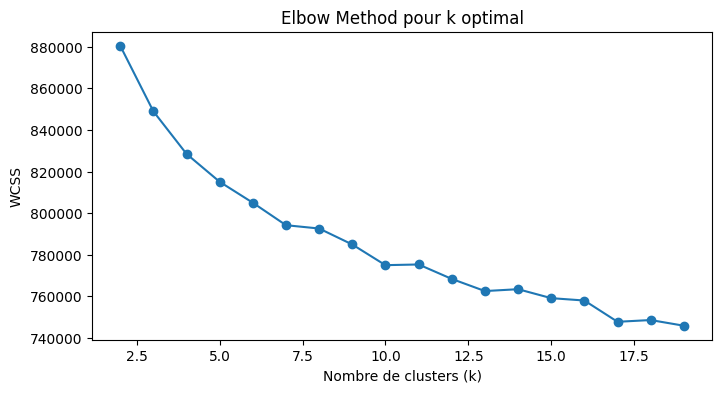

In [245]:
cluster_range = list(range(2, 20))
movie_matrix = utility_matrix.T

wcss = []
for k in cluster_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10).fit(movie_matrix)
    wcss.append(km.inertia_)

plt.figure(figsize=(8,4))
plt.plot(cluster_range, wcss, marker='o')
plt.xlabel("Nombre de clusters (k)")
plt.ylabel("WCSS")
plt.title("Elbow Method pour k optimal")
plt.show()

In [ ]:
k_clusters = 19

# K-Means clustering
kmeans = KMeans(n_clusters=k_clusters, random_state=0, n_init=10)
movie_clusters = kmeans.fit_predict(movie_matrix)

# DataFrame des clusters de films
movie_cluster_df = pd.DataFrame({'movie_id': movie_matrix.index,'cluster': movie_clusters}).set_index('movie_id')
movie_cluster_df.head(18)

,cluster
movie_id,
1,5
2,7
3,7
4,14
5,7
6,17
7,5
8,1
9,4


In [247]:
print(movie_cluster_df['cluster'].value_counts().sort_index())

ratings_with_clusters = train_ratings.merge(movie_cluster_df, on='movie_id')
utility_clustered_matrix = ratings_with_clusters.groupby(['user_id', 'cluster'])['rating'].mean().unstack()
utility_clustered_matrix = utility_clustered_matrix.fillna(0)

print(f"Matrice clustérisée créée: {utility_clustered_matrix.shape}")
utility_clustered_matrix.head(18)

cluster
0      149
1       36
2       11
3        5
4       15
5       16
6        1
7      171
8        1
9       69
10       8
11       2
12      37
13      21
14       7
15       9
16      21
17    1073
18       1
Name: count, dtype: int64
Matrice clustérisée créée: (943, 19)


cluster,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
user_id,,,,,,,,,,,,,,,,,,,
1,4.483871,3.545455,4.750000,4.500000,4.400000,3.833333,0.0,3.276596,5.0,4.117647,4.000000,0.0,4.000000,3.545455,4.400000,3.833333,4.142857,2.542857,4.0
2,4.666667,0.000000,0.000000,5.000000,4.142857,3.166667,5.0,3.333333,0.0,4.000000,0.000000,5.0,3.769231,0.000000,5.000000,0.000000,0.000000,2.666667,0.0
3,2.250000,0.000000,0.000000,0.000000,0.000000,2.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,3.166667,0.000000,0.000000,4.000000,0.000000,2.600000,0.0
4,5.000000,0.000000,0.000000,3.000000,0.000000,4.666667,0.0,0.000000,0.0,0.000000,0.000000,0.0,4.600000,4.000000,0.000000,0.000000,4.000000,4.625000,0.0
5,3.500000,2.823529,4.200000,3.333333,3.000000,3.833333,0.0,2.909091,4.0,3.666667,0.000000,5.0,0.000000,3.000000,4.000000,2.000000,4.000000,1.948718,0.0
6,3.740741,3.300000,3.333333,3.666667,2.714286,2.285714,0.0,2.500000,0.0,4.116279,4.666667,5.0,2.900000,3.250000,4.000000,3.750000,4.312500,2.928571,3.0
7,3.877551,4.333333,4.090909,4.500000,3.600000,3.500000,0.0,3.803571,5.0,4.326087,4.200000,5.0,3.400000,4.117647,4.800000,4.800000,4.800000,3.320513,5.0
8,4.000000,5.000000,4.500000,5.000000,3.000000,4.000000,0.0,3.666667,0.0,4.250000,0.000000,0.0,4.000000,3.000000,5.000000,0.000000,4.333333,2.200000,5.0
9,4.333333,4.000000,0.000000,5.000000,4.000000,4.000000,0.0,5.000000,0.0,0.000000,4.000000,0.0,3.333333,0.000000,0.000000,0.000000,3.000000,0.000000,0.0


In [248]:
similarity_matrix = utility_clustered_matrix.T.corr(method='pearson')
similarity_matrix = similarity_matrix.fillna(0)

print(f"Matrice de similarité créée: {similarity_matrix.shape}")
similarity_matrix.head(18)

Matrice de similarité créée: (943, 943)


user_id,1,2,3,4,5,6,7,8,9,10,...,934,935,936,937,938,939,940,941,942,943
user_id,,,,,,,,,,,,,,,,,,,,,
1,1.000000,-0.356956,0.058512,0.133598,0.158015,0.114425,0.523133,0.503269,0.286598,0.168835,...,0.069758,0.014621,-0.331501,-0.112658,0.180159,0.175565,-0.141431,0.000622,0.040043,0.236204
2,-0.356956,1.000000,0.037289,0.126841,0.138736,-0.006885,-0.378778,0.086742,0.182038,0.093677,...,0.352398,0.470112,0.978884,0.574276,0.525944,0.520640,0.396932,0.335320,-0.344086,-0.079494
3,0.058512,0.037289,1.000000,0.490374,-0.240117,0.029305,-0.078055,-0.140419,0.024687,0.203702,...,-0.042102,0.267166,0.120654,0.254523,0.330799,0.396510,-0.038596,0.186225,0.372488,-0.267684
4,0.133598,0.126841,0.490374,1.000000,0.029435,0.077647,-0.101510,0.286446,0.302020,0.246158,...,0.091956,0.223483,0.194688,0.245291,0.338585,0.396016,0.136826,0.170609,0.325418,-0.241585
5,0.158015,0.138736,-0.240117,0.029435,1.000000,0.232421,0.457146,0.198871,-0.029654,0.361139,...,0.498473,0.249782,0.154146,0.222636,0.103953,0.032409,0.434609,0.267820,-0.168879,0.774865
6,0.114425,-0.006885,0.029305,0.077647,0.232421,1.000000,0.570508,0.255636,0.133702,0.769116,...,0.333280,0.063661,0.017957,0.138953,-0.033535,-0.060393,-0.404894,0.058300,0.156033,0.176460
7,0.523133,-0.378778,-0.078055,-0.101510,0.457146,0.570508,1.000000,0.226298,-0.022817,0.305999,...,0.028297,-0.096050,-0.347670,-0.093428,-0.129714,-0.173168,-0.387477,-0.085044,-0.222762,0.671039
8,0.503269,0.086742,-0.140419,0.286446,0.198871,0.255636,0.226298,1.000000,0.329408,0.238968,...,0.033174,0.236537,0.113227,0.102467,0.314272,0.296591,0.075367,0.145336,0.023085,0.235377
9,0.286598,0.182038,0.024687,0.302020,-0.029654,0.133702,-0.022817,0.329408,1.000000,0.380538,...,0.281604,0.197795,0.150654,0.241986,0.328683,0.397102,0.039783,0.349522,0.143179,-0.290491


In [249]:
age = user_data.get('age', 30)
gender = user_data.get('gender', 'M')
occupation = user_data.get('occupation', '').lower()

similar_users_df = user_info.copy()

max_age_diff = 5  
similar_users_df['age_similarity'] = 1 - (abs(similar_users_df['age'] - age) / max_age_diff)

# Limiter à l'intervalle [0, 1]
similar_users_df['age_similarity'] = similar_users_df['age_similarity'].clip(0, 1)

# Similarité de genre (1 = identique, 0 = différent)
similar_users_df['gender_similarity'] = np.where(similar_users_df['gender'] == gender, 1, 0)

# Similarité d'occupation (1 = identique, 0.2 = différent)
similar_users_df['occupation_similarity'] = np.where(similar_users_df['occupation'].str.lower() == occupation, 1, 0.2)

similar_users_df['similarity_score'] = (similar_users_df['age_similarity'] * 0.7 + similar_users_df['gender_similarity'] * 0.2 + 
                                        similar_users_df['occupation_similarity'] * 0.1)

similar_users_df = similar_users_df.sort_values('similarity_score', ascending=False)

# Obtenir les utilisateurs les plus similaires (plus de variation)
top_similar_users = similar_users_df.head(100)['user_id'].tolist()

print(f"{len(top_similar_users)} utilisateurs similaires trouvés")

# Afficher des informations détaillées sur les utilisateurs les plus similaires
if len(top_similar_users) > 0:
    top_5 = similar_users_df.head(5)
    print("\nTop 5 utilisateurs les plus similaires:")
    for _, row in top_5.iterrows():
        print(f"- User {row['user_id']}: {row['age']} ans, {row['gender']}, {row['occupation']}")
        print(f"  Score de similarité: {row['similarity_score']:.2f} (âge: {row['age_similarity']:.2f}, " +
            f"genre: {row['gender_similarity']:.2f}, occupation: {row['occupation_similarity']:.2f})")

100 utilisateurs similaires trouvés

Top 5 utilisateurs les plus similaires:
- User 37: 23 ans, M, student
  Score de similarité: 0.92 (âge: 1.00, genre: 1.00, occupation: 0.20)
- User 706: 23 ans, M, student
  Score de similarité: 0.92 (âge: 1.00, genre: 1.00, occupation: 0.20)
- User 408: 23 ans, M, student
  Score de similarité: 0.92 (âge: 1.00, genre: 1.00, occupation: 0.20)
- User 391: 23 ans, M, student
  Score de similarité: 0.92 (âge: 1.00, genre: 1.00, occupation: 0.20)
- User 509: 23 ans, M, administrator
  Score de similarité: 0.92 (âge: 1.00, genre: 1.00, occupation: 0.20)


In [250]:
print("\nCréation d'un profil basé sur des utilisateurs similaires...")
    
# Filtrer les ratings pour n'inclure que les utilisateurs similaires
similar_ratings = ratings[ratings['user_id'].isin(top_similar_users)]
    
# Ajouter une pondération basée sur la position dans la liste (plus similaire = plus de poids)
weights = {}
for i, user_id in enumerate(top_similar_users):
    # Échelle inversée: le premier a le poids le plus élevé
    weights[user_id] = 1.0 - (i / len(top_similar_users) * 0.5)  # De 1.0 à 0.5
    
# Appliquer la pondération aux ratings
similar_ratings = similar_ratings.copy()
similar_ratings['weight'] = similar_ratings['user_id'].map(weights)
similar_ratings['weighted_rating'] = similar_ratings['rating'] * similar_ratings['weight']
    
# Agréger les notes pondérées par film
weighted_ratings = similar_ratings.groupby('movie_id').agg(
    total_weight=('weight', 'sum'),
    weighted_sum=('weighted_rating', 'sum')
)
    
# Calculer les notes moyennes pondérées
weighted_ratings['avg_rating'] = weighted_ratings['weighted_sum'] / weighted_ratings['total_weight']
    
# Identifier les films les mieux notés pour cet utilisateur
top_movies = weighted_ratings.sort_values('avg_rating', ascending=False).head(20)
    
# Obtenir les clusters de ces films
top_movie_clusters = movie_cluster_df.loc[top_movies.index].copy()
    
# Utiliser reset_index pour avoir movie_id comme colonne
top_movie_clusters = top_movie_clusters.reset_index()
    
top_movie_clusters


Création d'un profil basé sur des utilisateurs similaires...


,movie_id,cluster
0,1033,17
1,989,17
2,1404,17
3,1377,17
4,1375,17
5,119,17
6,1160,17
7,359,17
8,1344,17
9,966,17


In [251]:
# Calculer la préférence moyenne par cluster
cluster_preferences = top_movie_clusters.groupby('cluster')['movie_id'].count().to_dict()
total_count = sum(cluster_preferences.values())
    
# Normaliser les préférences de cluster sur une échelle de 0 à 5
normalized_preferences = {}
for cluster, count in cluster_preferences.items():
    normalized_preferences[cluster] = min(5.0, (count / total_count) * 10)
    
# Calculer la moyenne des préférences de cluster des utilisateurs similaires
target_user_id = user_data['user_id']
    
# Créer un profil avec des préférences par défaut
default_preferences = {cluster: 2.5 for cluster in range(len(utility_clustered_matrix.columns))}
    
# Mettre à jour avec les préférences calculées
default_preferences.update(normalized_preferences)
    
# Ajouter une variabilité aléatoire légère pour éviter des recommandations identiques
for cluster in default_preferences:
    # Ajouter un bruit aléatoire entre -0.3 et 0.3
    default_preferences[cluster] += np.random.uniform(-0.3, 0.3)
    # S'assurer que la note reste dans les limites 1-5
    default_preferences[cluster] = min(5.0, max(1.0, default_preferences[cluster]))
    
# Convertir en DataFrame
profile_df = pd.Series(default_preferences)
    
# Ajouter temporairement ce profil à la matrice clustérisée
utility_clustered_matrix.loc[target_user_id] = profile_df
    
# Mettre à jour la matrice de similarité pour inclure le nouvel utilisateur
similarity_matrix = utility_clustered_matrix.T.corr(method='pearson')
similarity_matrix = similarity_matrix.fillna(0)
    
print(f"Profil créé pour l'utilisateur {target_user_id}:")
for cluster, preference in sorted(default_preferences.items()):
    print(f"   - Cluster {cluster}: {preference:.2f}/5.0")

Profil créé pour l'utilisateur 970:
   - Cluster 0: 1.00/5.0
   - Cluster 1: 2.56/5.0
   - Cluster 2: 2.68/5.0
   - Cluster 3: 2.20/5.0
   - Cluster 4: 2.62/5.0
   - Cluster 5: 2.62/5.0
   - Cluster 6: 2.47/5.0
   - Cluster 7: 2.71/5.0
   - Cluster 8: 2.76/5.0
   - Cluster 9: 2.57/5.0
   - Cluster 10: 2.53/5.0
   - Cluster 11: 2.78/5.0
   - Cluster 12: 2.72/5.0
   - Cluster 13: 2.30/5.0
   - Cluster 14: 2.76/5.0
   - Cluster 15: 2.72/5.0
   - Cluster 16: 2.39/5.0
   - Cluster 17: 5.00/5.0
   - Cluster 18: 2.76/5.0


In [252]:
# Paramètres du système de recommandation
k_neighbors = 10

# Fonction pour prédire la note d'un utilisateur pour un film
def predict_rating(user_id, movie_id):
    """Prédire la note d'un utilisateur pour un film"""
    # Vérifier si l'utilisateur existe dans la matrice
    if user_id not in utility_clustered_matrix.index:
        return 3.0
    
    # Vérifier si le film existe dans le DataFrame de clusters
    if movie_id not in movie_cluster_df.index:
        return 3.0
    
    movie_cluster = movie_cluster_df.loc[movie_id, 'cluster']
    user_similarities = similarity_matrix.loc[user_id].abs()
    
    valid_users = utility_clustered_matrix[utility_clustered_matrix[movie_cluster] > 0].index
    valid_similarities = user_similarities[valid_users]
    
    top_k_users = valid_similarities.nlargest(k_neighbors)
    
    weighted_sum = 0
    similarity_sum = 0
    
    for similar_user, similarity in top_k_users.items():
        if similar_user != user_id and similarity > 0:
            rating = utility_clustered_matrix.loc[similar_user, movie_cluster]
            weighted_sum += similarity * rating
            similarity_sum += similarity
    
    predicted_rating = weighted_sum / similarity_sum
    return min(5.0, max(1.0, predicted_rating))

In [253]:
# Génération des recommandations
def recommend_movies(user_id, n_recommendations=10):
    """Recommander des films pour un utilisateur"""
    if user_id not in utility_clustered_matrix.index:
        return []
    
    # Vérifier les clusters préférés de l'utilisateur
    user_preferences = utility_clustered_matrix.loc[user_id]
    preferred_clusters = user_preferences.sort_values(ascending=False).index.tolist()
    
    all_movies = movie_cluster_df.index.tolist()
    predictions = []
    
    # pénalité aux films des clusters surreprésentés
    cluster_counts = {cluster: 0 for cluster in preferred_clusters}
    
    for movie_id in all_movies:
        # Vérifier si le film est dans le DataFrame des clusters
        if movie_id not in movie_cluster_df.index:
            continue
            
        cluster = movie_cluster_df.loc[movie_id, 'cluster']
        
        # Prédire la note
        predicted_rating = predict_rating(user_id, movie_id)
        
        # Ajouter une légère pénalité proportionnelle au nombre de films déjà sélectionnés dans ce cluster
        penalty = cluster_counts.get(cluster, 0) * 0.05
        adjusted_rating = predicted_rating - penalty
        
        predictions.append((movie_id, adjusted_rating, predicted_rating))
        
        # Incrémenter le compteur de cluster
        if cluster in cluster_counts:
            cluster_counts[cluster] += 1
    
    # Trier par note ajustée (pour la diversité)
    predictions.sort(key=lambda x: x[1], reverse=True)
    
    # Retourner les meilleures recommandations avec la note originale (non ajustée)
    return [(movie_id, orig_rating) for movie_id, _, orig_rating in predictions[:n_recommendations]]

## OUTPUT MODULE

In [254]:
# Chargement des informations sur les films
try:
    movie_info = pd.read_csv("ml-100k/u.item", sep="|", encoding='latin-1',
                            names=["movie_id", "title", "release_date", "video_release_date", "imdb_url"] 
                            + [f"genre_{i}" for i in range(19)])
    print("Informations des films chargées")
    movie_info_loaded = True
except FileNotFoundError:
    print("Fichier u.item non trouvé - affichage basique")
    movie_info = None
    movie_info_loaded = False

Informations des films chargées


In [255]:
# Génération et affichage des recommandations
n_recommendations = 10
target_user_id = user_data['user_id']

print(f"\nGÉNÉRATION DES RECOMMANDATIONS pour l'utilisateur {target_user_id}...")

recommendations = recommend_movies(target_user_id, n_recommendations)

if not recommendations:
    print("Aucune recommandation disponible pour cet utilisateur")
else:
    print(f"\nTOP {len(recommendations)} FILMS RECOMMANDÉS")
    print("="*60)
    
    for i, (movie_id, predicted_rating) in enumerate(recommendations, 1):
        movie_title = "Film inconnu"
        movie_year = ""
        movie_genres = []
        
        if movie_info_loaded and movie_id in movie_info['movie_id'].values:
            movie_info_row = movie_info[movie_info['movie_id'] == movie_id].iloc[0]
            movie_title = movie_info_row['title']
            
            # Extraire les genres
            genre_cols = [col for col in movie_info.columns if col.startswith('genre_')]
            genres = []
            for col in genre_cols:
                if movie_info_row[col] == 1:
                    # Extraire le nom du genre à partir du nom de colonne
                    genre_name = col.replace('genre_', '')
                    genres.append(genre_name)
        
        print(f"{i:2d}. {movie_title}")
        print(f"    Note prédite: {predicted_rating:.2f}/5.0")
        print("-" * 60)


GÉNÉRATION DES RECOMMANDATIONS pour l'utilisateur 970...

TOP 10 FILMS RECOMMANDÉS
 1. Braveheart (1995)
    Note prédite: 4.36/5.0
------------------------------------------------------------
 2. Richard III (1995)
    Note prédite: 4.28/5.0
------------------------------------------------------------
 3. Mighty Aphrodite (1995)
    Note prédite: 4.28/5.0
------------------------------------------------------------
 4. Antonia's Line (1995)
    Note prédite: 4.28/5.0
------------------------------------------------------------
 5. Star Wars (1977)
    Note prédite: 4.15/5.0
------------------------------------------------------------
 6. Angels and Insects (1995)
    Note prédite: 4.28/5.0
------------------------------------------------------------
 7. Silence of the Lambs, The (1991)
    Note prédite: 4.15/5.0
------------------------------------------------------------
 8. Titanic (1997)
    Note prédite: 4.09/5.0
------------------------------------------------------------
 9. Br

In [256]:
# Évaluation du système sur l'ensemble de test
print(f"\nÉVALUATION DU SYSTÈME")
print("-" * 25)

predictions = []
actuals = []

for _, row in test_ratings.iterrows():
    predicted = predict_rating(row['user_id'], row['movie_id'])
    predictions.append(predicted)
    actuals.append(row['rating'])

rmse = np.sqrt(root_mean_squared_error(actuals, predictions))
print(f"RMSE: {rmse:.6f}")
print(f"Échantillon testé: {len(test_ratings)} ratings")

# Statistiques finales
print(f"\nSTATISTIQUES FINALES")
print("-" * 20)
print(f"Utilisateur cible: {target_user_id}")
print(f"Âge: {user_data['age']} ans")
print(f"Genre: {user_data['gender']}")
print(f"Métier: {user_data['occupation']}")
print(f"Utilisateurs similaires trouvés: {len(top_similar_users)}")
print(f"Recommandations générées: {len(recommendations)}")
print(f"Performance RMSE: {rmse:.6f}")


ÉVALUATION DU SYSTÈME
-------------------------
RMSE: 1.031209
Échantillon testé: 20000 ratings

STATISTIQUES FINALES
--------------------
Utilisateur cible: 970
Âge: 23 ans
Genre: M
Métier: artist
Utilisateurs similaires trouvés: 100
Recommandations générées: 10
Performance RMSE: 1.031209


In [ ]:
# Fonction pour évaluer la RMSE avec différents nombres de clusters
def evaluate_clusters_rmse(train_ratings, test_ratings, utility_matrix, k_range=range(2, 20)):
    """Évalue la RMSE pour différents nombres de clusters"""
    
    results = []
    movie_matrix = utility_matrix.T
    
    print("Évaluation de la RMSE pour différents nombres de clusters:")
    print("-" * 50)
    print("{:<10} {:<15}".format("Clusters", "RMSE"))
    print("-" * 50)
    
    for k in k_range:
        # K-Means clustering
        kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
        movie_clusters = kmeans.fit_predict(movie_matrix)
        
        # DataFrame des clusters de films
        movie_cluster_df = pd.DataFrame({
            'movie_id': movie_matrix.index,
            'cluster': movie_clusters
        }).set_index('movie_id')
        
        # Création de la matrice clustérisée
        ratings_with_clusters = train_ratings.merge(movie_cluster_df, on='movie_id')
        utility_clustered_matrix = ratings_with_clusters.groupby(['user_id', 'cluster'])['rating'].mean().unstack()
        utility_clustered_matrix = utility_clustered_matrix.fillna(0)
        
        # Calcul de la similarité
        similarity_matrix = utility_clustered_matrix.T.corr(method='pearson')
        similarity_matrix = similarity_matrix.fillna(0)
        
        # Test avec k_neighbors optimal
        k_neighbors = 10
        
        # Prédictions
        predictions = []
        actuals = []
        
        for _, row in test_ratings.iterrows():
            user_id = row['user_id']
            movie_id = row['movie_id']
            
            # Skip si l'utilisateur ou le film n'existe pas
            if user_id not in utility_clustered_matrix.index or movie_id not in movie_cluster_df.index:
                continue
                
            movie_cluster = movie_cluster_df.loc[movie_id, 'cluster']
            user_similarities = similarity_matrix.loc[user_id].abs()
            
            valid_users = utility_clustered_matrix[utility_clustered_matrix[movie_cluster] > 0].index
            valid_similarities = user_similarities[valid_users]
            
            if len(valid_similarities) == 0:
                predictions.append(3.0)  # Valeur par défaut
            else:
                top_k_users = valid_similarities.nlargest(k_neighbors)
                
                weighted_sum = 0
                similarity_sum = 0
                
                for similar_user, similarity in top_k_users.items():
                    if similar_user != user_id and similarity > 0:
                        rating = utility_clustered_matrix.loc[similar_user, movie_cluster]
                        weighted_sum += similarity * rating
                        similarity_sum += similarity
                
                if similarity_sum == 0:
                    predictions.append(3.0)  # Valeur par défaut
                else:
                    predicted_rating = weighted_sum / similarity_sum
                    predictions.append(min(5.0, max(1.0, predicted_rating)))
                    
            actuals.append(row['rating'])
        
        # Calcul de la RMSE
        rmse = np.sqrt(root_mean_squared_error(actuals, predictions))
        
        # Ajout aux résultats
        results.append((k, rmse))
        
        print("{:<10} {:<15.6f}".format(k, rmse))
    
    return results

# Exécuter l'évaluation
cluster_rmse_results = evaluate_clusters_rmse(train_ratings, test_ratings, utility_matrix)

# Visualiser les résultats
plt.figure(figsize=(10, 6))
k_values = [k for k, _ in cluster_rmse_results]
rmse_values = [rmse for _, rmse in cluster_rmse_results]
plt.plot(k_values, rmse_values, marker='o', linestyle='-', color='blue')
plt.title('RMSE en fonction du nombre de clusters (k)')
plt.xlabel('Nombre de clusters (k)')
plt.ylabel('RMSE')
plt.grid(True, linestyle='--', alpha=0.7)

# Trouver le k optimal
best_k = k_values[rmse_values.index(min(rmse_values))]
best_rmse = min(rmse_values)
plt.axvline(x=best_k, color='red', linestyle='--', alpha=0.7)
plt.axhline(y=best_rmse, color='red', linestyle='--', alpha=0.7)
plt.annotate(f'Meilleur k={best_k}\nRMSE={best_rmse:.6f}', 
            xy=(best_k, best_rmse), xytext=(best_k+1, best_rmse+0.02),
            arrowprops=dict(facecolor='black', shrink=0.05, width=1.5))
plt.show()

print(f"\nMeilleur nombre de clusters: {best_k} avec RMSE = {best_rmse:.6f}")

Évaluation de la RMSE pour différents nombres de clusters:
--------------------------------------------------
Clusters   RMSE           
--------------------------------------------------
2          1.086324       
3          1.044152       
4          1.039586       
5          1.033846       
6          1.031608       
7          1.035413       


KeyboardInterrupt: 